In [1]:
%load_ext autoreload
%autoreload 2

In [37]:
import pandas as pd
from utils.predictiveNet import PredictiveNet
import matplotlib.pyplot as plt
import numpy as np
from utils.general import saveFig
import itertools
import torch
import random
from copy import deepcopy
from utils.agent import RandomActionAgent
from analysis.representationalGeometryAnalysis import representationalGeometryAnalysis

In [3]:
savefolder = 'Figures/S19_RolloutNet/'

In [4]:
nettypes = ['thcycRNN_5win']
acttypes = ['first','firstc','full','fullc','hold','holdc',
           'first_adapt','firstc_adapt','full_adapt','fullc_adapt','hold_adapt','holdc_adapt']
seeds = ['100','101','102','103','104','105','106','107','108']
#lr = [1e-4,1.5e-4,3e-4,5.5e-4,1e-3,1.5e-3,3e-3]
netprops = itertools.product(*[nettypes,['_'],acttypes,['--s'],seeds])
netprops = list(netprops)
netnames = [''.join(name) for name in netprops]
nettype = [name[0] for name in netprops]
#netmask = [name[4] for name in netprops]
netk = [name[2] for name in netprops]

netfolder = '/Theta_panel/'

analysisFrame = pd.DataFrame(data={'filename':netnames, 'type':nettype, 'netfolder':netfolder,
                                  'acttype':netk})

In [5]:
#netfolder = '/hyperparm_panel_masked/'
def loadNet(row):
    netfolder = row.netfolder
    try:
        net = PredictiveNet.loadNet(netfolder+row['filename'],suppressText=True)
        return net
    except:
        print(f"{row['filename']} does not exist")
        #net = PredictiveNet
        

analysisFrame['net'] = analysisFrame.apply(loadNet, axis = 1)
analysisFrame = analysisFrame.dropna()
analysisFrame

thcycRNN_5win_first--s100 does not exist
thcycRNN_5win_first--s101 does not exist
thcycRNN_5win_first--s102 does not exist
thcycRNN_5win_first--s103 does not exist
thcycRNN_5win_first--s104 does not exist
thcycRNN_5win_first--s105 does not exist
thcycRNN_5win_first--s106 does not exist
thcycRNN_5win_first--s107 does not exist
thcycRNN_5win_first--s108 does not exist
thcycRNN_5win_firstc--s100 does not exist
thcycRNN_5win_firstc--s101 does not exist
thcycRNN_5win_firstc--s102 does not exist
thcycRNN_5win_firstc--s103 does not exist
thcycRNN_5win_firstc--s104 does not exist
thcycRNN_5win_firstc--s105 does not exist
thcycRNN_5win_firstc--s106 does not exist
thcycRNN_5win_firstc--s107 does not exist
thcycRNN_5win_firstc--s108 does not exist
thcycRNN_5win_hold--s100 does not exist
thcycRNN_5win_hold--s101 does not exist
thcycRNN_5win_hold--s102 does not exist
thcycRNN_5win_hold--s103 does not exist
thcycRNN_5win_hold--s104 does not exist
thcycRNN_5win_hold--s105 does not exist
thcycRNN_5win

,filename,type,netfolder,acttype,net
18,thcycRNN_5win_full--s100,thcycRNN_5win,/Theta_panel/,full,<utils.predictiveNet.PredictiveNet object at 0...
19,thcycRNN_5win_full--s101,thcycRNN_5win,/Theta_panel/,full,<utils.predictiveNet.PredictiveNet object at 0...
20,thcycRNN_5win_full--s102,thcycRNN_5win,/Theta_panel/,full,<utils.predictiveNet.PredictiveNet object at 0...
21,thcycRNN_5win_full--s103,thcycRNN_5win,/Theta_panel/,full,<utils.predictiveNet.PredictiveNet object at 0...
22,thcycRNN_5win_full--s104,thcycRNN_5win,/Theta_panel/,full,<utils.predictiveNet.PredictiveNet object at 0...
23,thcycRNN_5win_full--s105,thcycRNN_5win,/Theta_panel/,full,<utils.predictiveNet.PredictiveNet object at 0...
24,thcycRNN_5win_full--s106,thcycRNN_5win,/Theta_panel/,full,<utils.predictiveNet.PredictiveNet object at 0...
25,thcycRNN_5win_full--s107,thcycRNN_5win,/Theta_panel/,full,<utils.predictiveNet.PredictiveNet object at 0...
26,thcycRNN_5win_full--s108,thcycRNN_5win,/Theta_panel/,full,<utils.predictiveNet.PredictiveNet object at 0...
27,thcycRNN_5win_fullc--s100,thcycRNN_5win,/Theta_panel/,fullc,<utils.predictiveNet.PredictiveNet object at 0...


In [6]:
#analysisFrame['net'][0].trainArgs
def getTrainParms(row):
    predictiveNet = row['net']
    lr = predictiveNet.trainArgs.lr
    seed = predictiveNet.trainArgs.seed
    weight_decay = predictiveNet.trainArgs.weight_decay
    bptttrunc = predictiveNet.trainArgs.bptttrunc
    seqdur = predictiveNet.trainArgs.seqdur
    dropp = predictiveNet.trainArgs.dropout
    ntimescale = predictiveNet.trainArgs.ntimescale
    nneurons = predictiveNet.trainArgs.hiddensize
    noisestd = predictiveNet.trainArgs.noisestd
    sparsity = predictiveNet.trainArgs.sparsity
    
    return lr,bptttrunc,seqdur,seed,dropp,ntimescale,weight_decay,nneurons,noisestd,sparsity
analysisFrame[['lr','bptt','seqdur','seed','dropp','ntimescale','weight_decay','nneurons','noisestd','sparsity']] = analysisFrame.apply(getTrainParms, axis = 1, result_type="expand")


In [7]:
#Calculate spatial info and decoding performance
def getSpatialRep(row):
    predictiveNet = loadNet(row)
    if predictiveNet == None:
        return np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan
    #predictiveNet= row.net
    #print(len(predictiveNet.TrainingSaver['sRSA'].values))
    try:
        SI = predictiveNet.TrainingSaver['SI'].values[-1]
        sRSA = predictiveNet.TrainingSaver['sRSA'].values[-1]

        EVs = predictiveNet.TrainingSaver['EVs'].values[-1]
        
        SWdist = predictiveNet.TrainingSaver['SWdist'].values[-1]
        finalLoss = predictiveNet.TrainingSaver['loss'].values[-1]
    except:
        SI = predictiveNet.TrainingSaver['SI']
        sRSA = predictiveNet.TrainingSaver['sRSA']

        EVs = predictiveNet.TrainingSaver['EVs']
        
        SWdist = predictiveNet.TrainingSaver['SWdist']
        finalLoss = predictiveNet.TrainingSaver['loss']
        
    meanSI = np.nanmean(SI)
    EVsp50 = np.nanmean(EVs>0.5)
    tunedSI = np.nanmean(SI[EVs>0.5])
    
    return SI, meanSI, sRSA, EVs, EVsp50, finalLoss, SWdist, tunedSI
analysisFrame[['SI','meanSI','sRSA','EVs','EVs50','finalLoss','SWdist','tunedSI']] = analysisFrame.apply(getSpatialRep, axis = 1, result_type="expand")

<Figure size 640x480 with 0 Axes>

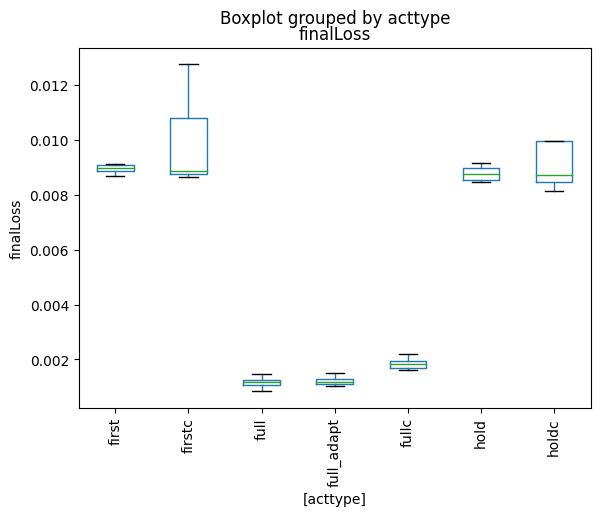

<Figure size 640x480 with 0 Axes>

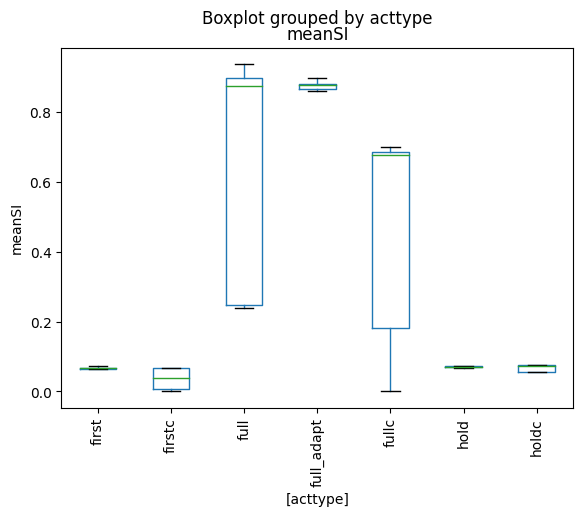

<Figure size 640x480 with 0 Axes>

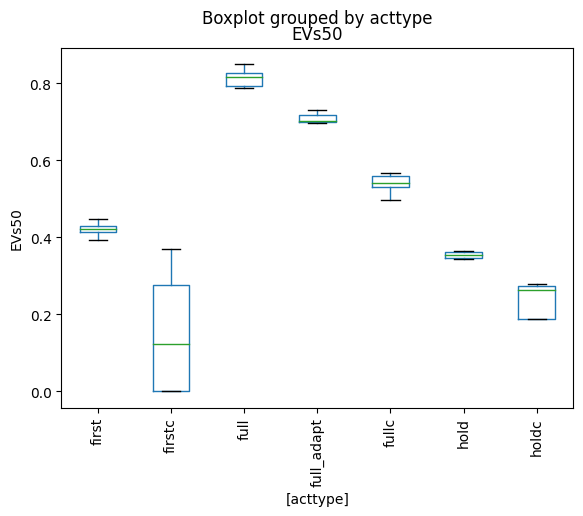

<Figure size 640x480 with 0 Axes>

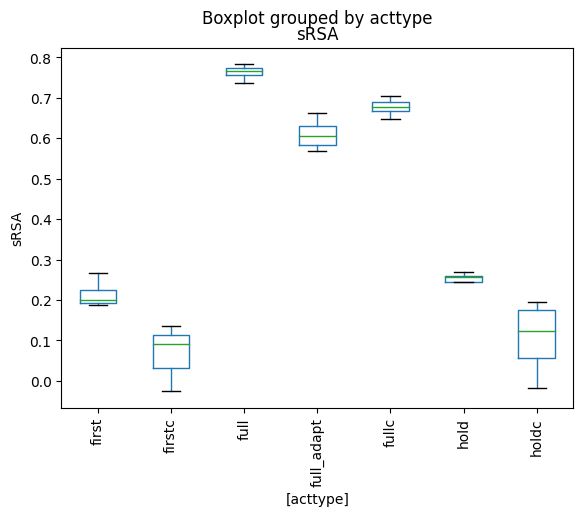

<Figure size 640x480 with 0 Axes>

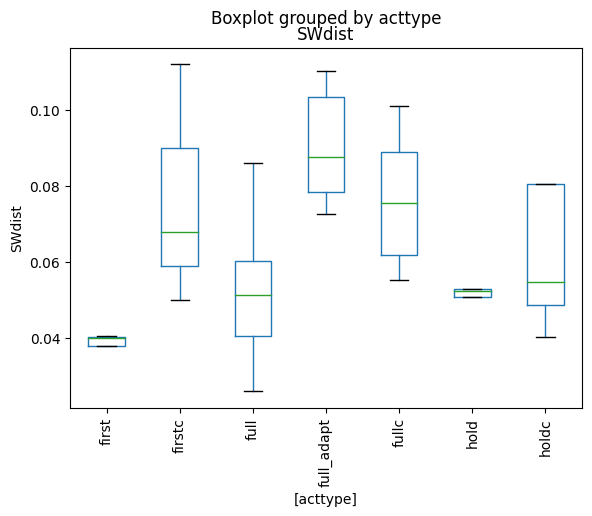

In [41]:
metrics = ['finalLoss','meanSI','EVs50','sRSA','SWdist']
for metric in metrics:
    plt.figure()
    #ax=plt.subplot(3,3,1)
    analysisFrame.boxplot(column=metric,by=["acttype"],
                          rot=90,grid=False,showfliers=False)
                          #positions=[1,2,3,4,5,6,7,8,13,14,15,16,9,10,11,12])
    plt.ylabel(metric)
    saveFig(plt.gcf(),'CompareNets'+metric,savefolder,
            filetype='pdf')

#plt.figure()
#analysisFrame.boxplot(column='meanSI',by=["type","dropp","noisestd"],rot=90)
#plt.figure()
#analysisFrame.boxplot(column='EVs50',by=["type","dropp","noisestd"],rot=90)
#plt.figure()
#analysisFrame.boxplot(column='tunedSI',by=["type","dropp","noisestd"],rot=90)
#plt.figure()
#analysisFrame.boxplot(column='sRSA',by=["type","dropp","noisestd"],rot=90)
#plt.figure()
#analysisFrame.boxplot(column='SWdist',by=["type","dropp","noisestd"],rot=90)


In [29]:
analysisFrame

,filename,type,netfolder,acttype,net,lr,bptt,seqdur,seed,dropp,...,noisestd,sparsity,SI,meanSI,sRSA,EVs,EVs50,finalLoss,SWdist,tunedSI
18,thcycRNN_5win_full--s100,thcycRNN_5win,/Theta_panel/,full,<utils.predictiveNet.PredictiveNet object at 0...,0.002,100000000.0,300.0,100.0,0.15,...,0.03,0.5,"[[1.2469914990445392], [0.04077680981733701], ...",0.897448,0.772187,"[0.631984, 0.77541167, 0.6606071, 0.8103336, 0...",0.826,0.001452,0.059435,0.945111
19,thcycRNN_5win_full--s101,thcycRNN_5win,/Theta_panel/,full,<utils.predictiveNet.PredictiveNet object at 0...,0.002,100000000.0,300.0,101.0,0.15,...,0.03,0.5,"[[0.033897197205993705], [1.2589940453867994],...",0.876461,0.773402,"[0.8696532, 0.64385843, 0.7979638, 0.8666799, ...",0.792,0.001165,0.025988,0.954673
20,thcycRNN_5win_full--s102,thcycRNN_5win,/Theta_panel/,full,<utils.predictiveNet.PredictiveNet object at 0...,0.002,100000000.0,300.0,102.0,0.15,...,0.03,0.5,"[[0.47342786240088935], [1.189483954194217], [...",0.937971,0.765643,"[0.7598065, 0.8843214, 0.6894653, 0.72769606, ...",0.828,0.001236,0.086009,0.994849
21,thcycRNN_5win_full--s103,thcycRNN_5win,/Theta_panel/,full,<utils.predictiveNet.PredictiveNet object at 0...,0.002,100000000.0,300.0,103.0,0.15,...,0.03,0.5,"[[1.3076270788647446], [1.0224524165590765], [...",0.899162,0.763252,"[0.81071454, 0.7949712, 0.28655308, 0.4298036,...",0.794,0.001056,0.084400,0.956945
22,thcycRNN_5win_full--s104,thcycRNN_5win,/Theta_panel/,full,<utils.predictiveNet.PredictiveNet object at 0...,0.002,100000000.0,300.0,104.0,0.15,...,0.03,0.5,"[[1.0275236002415842], [0.9178587994103704], [...",0.888332,0.782565,"[0.6268469, 0.5796432, 0.6626463, 0.6720927, 0...",0.816,0.001041,0.047816,0.943943
23,thcycRNN_5win_full--s105,thcycRNN_5win,/Theta_panel/,full,<utils.predictiveNet.PredictiveNet object at 0...,0.002,100000000.0,300.0,105.0,0.15,...,0.03,0.5,"[[1.2239707588443467], [0.44765195901582744], ...",0.879135,0.783434,"[0.6788146, 0.7428199, 0.77823085, 0.40281963,...",0.790,0.001202,0.032824,0.943153
24,thcycRNN_5win_full--s106,thcycRNN_5win,/Theta_panel/,full,<utils.predictiveNet.PredictiveNet object at 0...,0.002,100000000.0,300.0,106.0,0.15,...,0.03,0.5,"[[0.9003995503905625], [0.42944563777390626], ...",0.861898,0.783245,"[0.34789908, 0.6380216, 0.4089234, 0.5076784, ...",0.810,0.001265,0.054436,0.916244
25,thcycRNN_5win_full--s107,thcycRNN_5win,/Theta_panel/,full,<utils.predictiveNet.PredictiveNet object at 0...,0.002,100000000.0,300.0,107.0,0.15,...,0.03,0.5,"[[0.8509569326331108], [1.2157367664796475], [...",0.902981,0.746763,"[0.3122307, 0.8823489, 0.6981424, 0.24951208, ...",0.788,0.001132,0.071958,0.971284
26,thcycRNN_5win_full--s108,thcycRNN_5win,/Theta_panel/,full,<utils.predictiveNet.PredictiveNet object at 0...,0.002,100000000.0,300.0,108.0,0.15,...,0.03,0.5,"[[0.9998796415526034], [0.8977544532359335], [...",0.860110,0.772242,"[0.67543864, 0.69624114, 0.87216914, 0.3968306...",0.800,0.001474,0.040470,0.930082
27,thcycRNN_5win_fullc--s100,thcycRNN_5win,/Theta_panel/,fullc,<utils.predictiveNet.PredictiveNet object at 0...,0.002,100000000.0,300.0,100.0,0.15,...,0.03,0.5,"[[0.2179368893567417], [0.8310446944894323], [...",0.666360,0.678244,"[0.44753027, 0.47655874, 0.71709836, 0.406381,...",0.530,0.002189,0.061794,0.864267


In [33]:
exSeed = 101
analysisFrame_exSeed = analysisFrame[analysisFrame.seed==exSeed]
analysisFrame_exSeed

,filename,type,netfolder,acttype,net,lr,bptt,seqdur,seed,dropp,...,noisestd,sparsity,SI,meanSI,sRSA,EVs,EVs50,finalLoss,SWdist,tunedSI
19,thcycRNN_5win_full--s101,thcycRNN_5win,/Theta_panel/,full,<utils.predictiveNet.PredictiveNet object at 0...,0.002,100000000.0,300.0,101.0,0.15,...,0.03,0.5,"[[0.033897197205993705], [1.2589940453867994],...",0.876461,0.773402,"[0.8696532, 0.64385843, 0.7979638, 0.8666799, ...",0.792,0.001165,0.025988,0.954673
28,thcycRNN_5win_fullc--s101,thcycRNN_5win,/Theta_panel/,fullc,<utils.predictiveNet.PredictiveNet object at 0...,0.002,100000000.0,300.0,101.0,0.15,...,0.03,0.5,"[[0.3273034766922915], [0.6628845947173252], [...",0.686872,0.669688,"[0.6421242, 0.63070446, 0.5209211, 0.45485353,...",0.496,0.001921,0.057082,0.865848
73,thcycRNN_5win_full_adapt--s101,thcycRNN_5win,/Theta_panel/,full_adapt,<utils.predictiveNet.PredictiveNet object at 0...,0.002,100000000.0,300.0,101.0,0.15,...,0.03,0.5,"[[0.3517651124280224], [1.6777375875422815], [...",0.877052,0.568608,"[0.7389964, 0.7232989, 0.72034085, 0.6078609, ...",0.700,0.001097,0.040320,0.968681


In [14]:
from analysis.SpatialTuningAnalysis import SpatialTuningAnalysis

In [15]:
def TuningCurvePlot(row):
    predictiveNet = row['net']
    STA = SpatialTuningAnalysis(predictiveNet,inputControl=True, untrainedControl=False,ratenorm=True)
    netname = row.acttype

    print(row['acttype'])
    STA.TCExamplesFigure(netname,savefolder)
    plt.show()
    
    return STA
analysisFrame_exSeed['STA'] = analysisFrame_exSeed.apply(TuningCurvePlot, axis = 1)

Getting Tuning Curves for Input Units


KeyboardInterrupt: 

In [ ]:
from analysis.representationalGeometryAnalysis import representationalGeometryAnalysis



In [ ]:
isomap_neighbors = 50
def RepresentationalGeometry(row):
    predictiveNet = row['net']
    netname = row.acttype

    print(row['acttype'])
    RGA = representationalGeometryAnalysis(predictiveNet,noisemag = 0, noisestd=0.1, withIsomap=True,
                                       actRSA = False,obsRSA=False, HDRSA=False,
                                      theta='expand',
                                        n_neighbors = isomap_neighbors)
    RGA.WakeSleepFigure(netname,savefolder)
    plt.show()
    
    return RGA
analysisFrame_exSeed['RGA'] = analysisFrame_exSeed.apply(RepresentationalGeometry, axis = 1)

In [38]:
predictiveNet = deepcopy(analysisFrame_exSeed.iloc[0].net)

In [39]:
predictiveNet.pRNN.actionTheta

True

In [40]:
env = predictiveNet.EnvLibrary[0]
agentname = 'RandomActionAgent'
action_probability = np.array([0.15,0.15,0.6,0.1,0,0,0])
agent = RandomActionAgent(env.action_space,action_probability)
place_fields, SI, decoder = predictiveNet.calculateSpatialRepresentation(env,agent,
                                             trainDecoder=True,
                                            trainHDDecoder = True)

/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:340: RuntimeWarning: invalid value encountered in divide
  fxfr = fx / fr
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:351: RuntimeWarning: invalid value encountered in divide
  SI = SI / fr[:, 0, 0]


Training Decoder on cuda...
loss: 5.812512 [    0\ 5000]
loss: 0.915734 [  500\ 5000]
loss: 0.643855 [ 1000\ 5000]
loss: 0.522556 [ 1500\ 5000]
loss: 0.440374 [ 2000\ 5000]
loss: 0.393659 [ 2500\ 5000]
loss: 0.349115 [ 3000\ 5000]
loss: 0.314238 [ 3500\ 5000]
loss: 0.288989 [ 4000\ 5000]
loss: 0.268685 [ 4500\ 5000]
loss: 0.252508 [ 4999\ 5000]
Training Complete. Back to the cpu
Training Decoder on cuda...
loss: 1.393774 [    0\ 5000]
loss: 0.550061 [  500\ 5000]
loss: 0.387528 [ 1000\ 5000]
loss: 0.304711 [ 1500\ 5000]
loss: 0.249647 [ 2000\ 5000]
loss: 0.209305 [ 2500\ 5000]
loss: 0.188413 [ 3000\ 5000]
loss: 0.173895 [ 3500\ 5000]
loss: 0.155680 [ 4000\ 5000]
loss: 0.141343 [ 4500\ 5000]
loss: 0.132148 [ 4999\ 5000]
Training Complete. Back to the cpu


Running WAKE


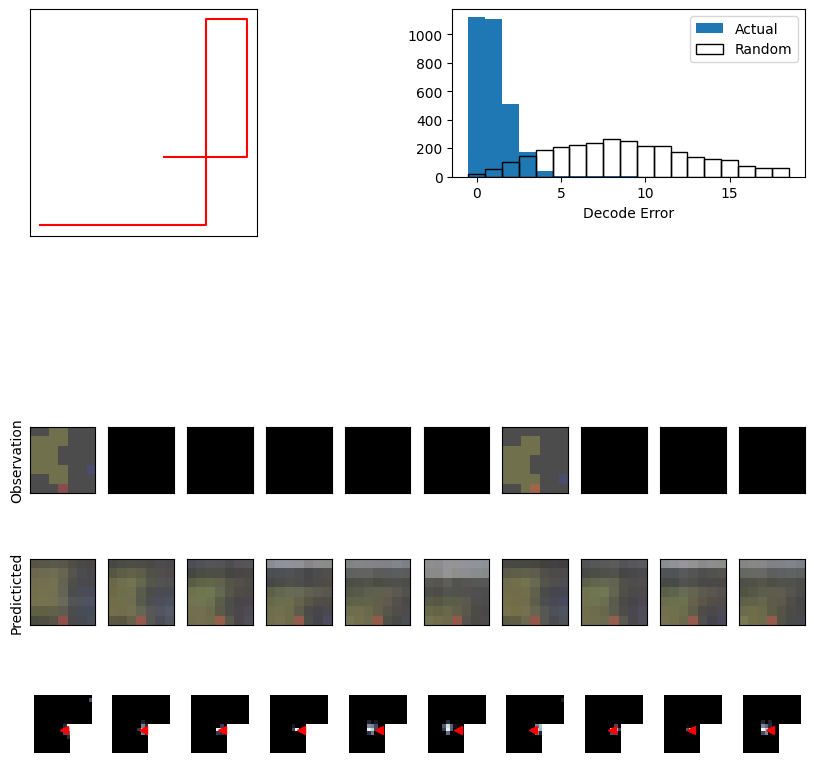

In [43]:
dA = decodeAnalysis(predictiveNet,decoder=decoder,timesteps = 498)
dA.decodeSequenceFigure(None,None)

In [44]:
predictiveNet.pRNN.actionTheta

True

In [128]:
predictiveNet.pRNN.actionTheta = 'hold'

In [154]:
predictiveNet.pRNN.actionTheta = 'hold'
obs,act,state,_ = predictiveNet.collectObservationSequence(env,
                                                     agent,
                                                     101)
obs_pred, obs_next, h = predictiveNet.predict(obs,act)
x_t, obs_target, outmask = predictiveNet.pRNN.restructure_inputs(obs,act)

In [132]:
101-5

96

In [130]:
print(obs_pred.shape)
print(obs.shape)
print(obs_target.shape)
print(act.shape)

torch.Size([6, 97, 147])
torch.Size([1, 102, 147])
torch.Size([6, 97, 147])
torch.Size([1, 101, 11])


In [151]:
predictiveNet.pRNN.actionTheta = True
obs,act,state,_ = predictiveNet.collectObservationSequence(env,
                                                     agent,
                                                     498)
obs_pred, obs_next, h = predictiveNet.predict(obs,act)
x_t, obs_target, outmask = predictiveNet.pRNN.restructure_inputs(obs,act)

In [136]:
print(obs_pred.shape)
print(obs.shape)
print(obs_target.shape)

torch.Size([6, 493, 147])
torch.Size([1, 499, 147])
torch.Size([6, 493, 147])


In [109]:
k=5
obs_temp = obs_pred
obs_temp[:,::k,:]=obs[:,:-k,:]

RuntimeError: The expanded size of the tensor (20) must match the existing size (97) at non-singleton dimension 1.  Target sizes: [6, 20, 147].  Tensor sizes: [97, 147]

In [89]:
x_t, obs_target, outmask = predictiveNet.pRNN.restructure_inputs(obs,act)

In [91]:
obs_target.shape

torch.Size([6, 96, 147])

In [94]:
obs.shape
#obs_pred.shape

torch.Size([1, 102, 147])

In [46]:
from analysis.decodeAnalysis import decodeAnalysis

In [155]:
dA = decodeAnalysis(predictiveNet,decoder=decoder,timesteps = 497)

Running WAKE


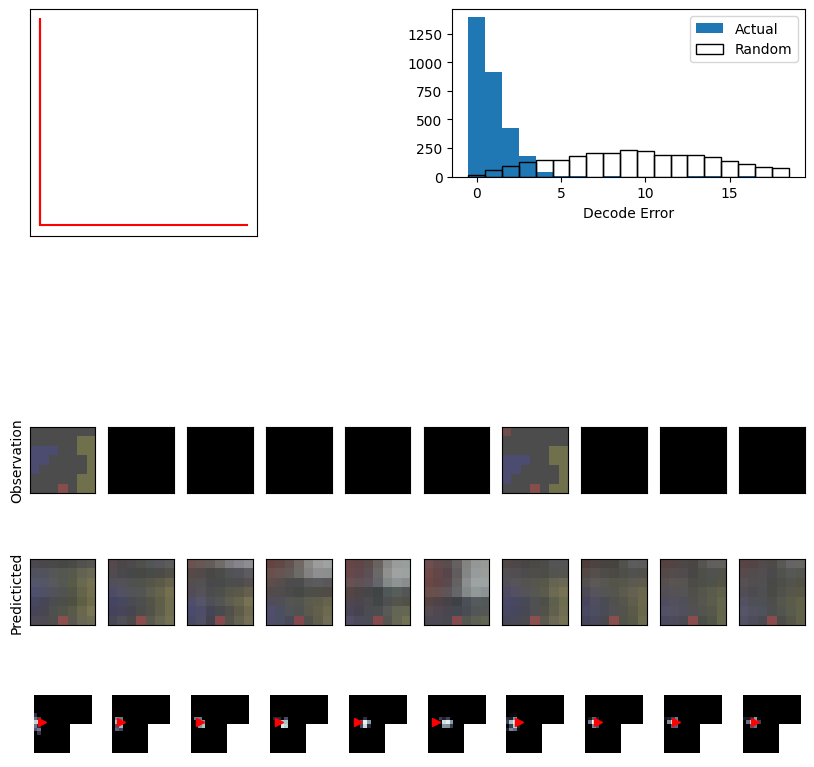

In [162]:
netname='thetahold'
dA.decodeSequenceFigure(netname,savefolder,timesteps=1996)

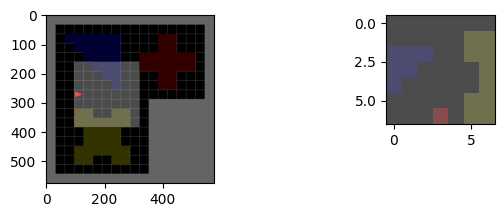

In [177]:
obs= env.step(1)
render = env.render(mode=None)
plt.figure()
plt.subplot(2,2,1)
plt.imshow(render)

plt.subplot(3,3,3)
plt.imshow(obs[0]['image'])

saveFig(plt.gcf(),'EnvRollout1',savefolder,
        filetype='pdf')

plt.show()
